# BPML - Final Submission
Dataset yang digunakan merupakan data penyakit tanaman tomat yang terdiri dari 8 kelas.

### Menentukan ukuran gambar

In [1]:
height = 128
width = 128
depth = 3

### menetukan directory data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
base_dir = '/content/drive/My Drive/dataset/tomato-desease'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
os.listdir(train_dir)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

### Membuat image data generator

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(
    rotation_range=25, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip = True,
    rescale = 1./255,
    fill_mode = 'nearest'
)

### Load data

In [5]:
print('Data Training')
train_data = image_datagen.flow_from_directory(
    train_dir,
    target_size = (height,width),
    batch_size = 10,
    class_mode = 'categorical'
)

print('Data Testing')
test_data = image_datagen.flow_from_directory(
    test_dir,
    target_size = (height,width),
    batch_size = 10,
    class_mode = 'categorical'
)

Data Training
Found 10863 images belonging to 8 classes.
Data Testing
Found 2715 images belonging to 8 classes.


### Arsitektur Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def cnn(input_shape):
    name = 'cnn'
    model = Sequential(name=name)
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(4,4))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (5,5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    return model

In [7]:
input_shape = (height, width, depth)
model = cnn(input_shape)
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        2320    

### Learning Rate

In [8]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

pre_model = cnn(input_shape)
lr_schedule = LearningRateScheduler(
    lambda epoch: 1.000e-6 * 10**(epoch / 20))

pre_model.compile(
    loss= 'categorical_crossentropy', 
    optimizer= Adam(lr=1.000e-6, decay=1.000e-6 / 2),
    metrics= ['accuracy']
)
pre_history = pre_model.fit(
    train_data,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test_data,
    validation_steps=10,
    verbose=1,
    callbacks=[lr_schedule]
)

Epoch 1/100
100/100 [==============================] - 7s 69ms/step - loss: 2.0967 - accuracy: 0.0950 - val_loss: 2.0829 - val_accuracy: 0.1200
Epoch 2/100
100/100 [==============================] - 7s 68ms/step - loss: 2.0954 - accuracy: 0.1140 - val_loss: 2.0898 - val_accuracy: 0.1000
Epoch 3/100
100/100 [==============================] - 7s 67ms/step - loss: 2.1018 - accuracy: 0.1200 - val_loss: 2.0802 - val_accuracy: 0.1200
Epoch 4/100
100/100 [==============================] - 7s 69ms/step - loss: 2.0818 - accuracy: 0.1280 - val_loss: 2.0833 - val_accuracy: 0.0600
Epoch 5/100
100/100 [==============================] - 7s 68ms/step - loss: 2.0856 - accuracy: 0.1360 - val_loss: 2.0721 - val_accuracy: 0.1500
Epoch 6/100
100/100 [==============================] - 7s 67ms/step - loss: 2.0881 - accuracy: 0.1110 - val_loss: 2.0832 - val_accuracy: 0.0900
Epoch 7/100
100/100 [==============================] - 7s 67ms/step - loss: 2.0809 - accuracy: 0.1270 - val_loss: 2.0791 - val_accuracy:

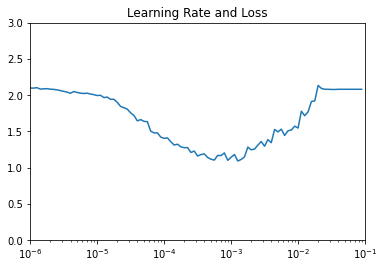

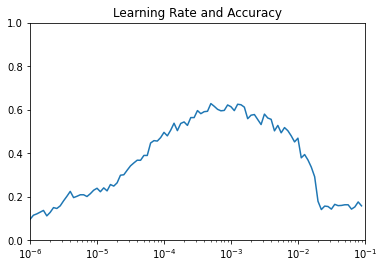

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(pre_history.history["lr"], pre_history.history["loss"])
plt.title('Learning Rate and Loss')
plt.axis([1e-6, 1e-1, 0, 3])

plt.figure()
plt.semilogx(pre_history.history["lr"], pre_history.history["accuracy"])
plt.title('Learning Rate and Accuracy')
plt.axis([1e-6, 1e-1, 0, 1])

plt.show()

### Compile Model

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss= 'categorical_crossentropy', 
    optimizer= Adam(lr=1.000e-3, decay=1.000e-3 / 2),
    metrics= ['accuracy']
)

### Fitting model

In [11]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.85 and logs.get('val_accuracy')>=0.85):
          print("Akurasi telah mencapai > 85% !")
          self.model.stop_training = True

In [12]:
num_epochs = 600
history = model.fit(
    train_data,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=test_data,
    validation_steps=10,
    verbose=1,
    callbacks=[MyCallback()]
)

Starting training; got log keys: []
Epoch 1/600
100/100 [==============================] - 7s 74ms/step - loss: 1.9235 - accuracy: 0.2420 - val_loss: 2.3632 - val_accuracy: 0.2000
Epoch 2/600
100/100 [==============================] - 7s 71ms/step - loss: 1.7343 - accuracy: 0.3680 - val_loss: 2.2750 - val_accuracy: 0.1400
Epoch 3/600
100/100 [==============================] - 7s 70ms/step - loss: 1.5705 - accuracy: 0.4190 - val_loss: 3.0817 - val_accuracy: 0.1300
Epoch 4/600
100/100 [==============================] - 7s 69ms/step - loss: 1.5040 - accuracy: 0.4410 - val_loss: 2.3560 - val_accuracy: 0.2600
Epoch 5/600
100/100 [==============================] - 7s 68ms/step - loss: 1.4710 - accuracy: 0.4660 - val_loss: 2.1485 - val_accuracy: 0.3700
Epoch 6/600
100/100 [==============================] - 7s 69ms/step - loss: 1.4916 - accuracy: 0.4740 - val_loss: 1.3919 - val_accuracy: 0.5100
Epoch 7/600
100/100 [==============================] - 7s 68ms/step - loss: 1.3190 - accuracy: 0.510

### Plot perubahan akurasi

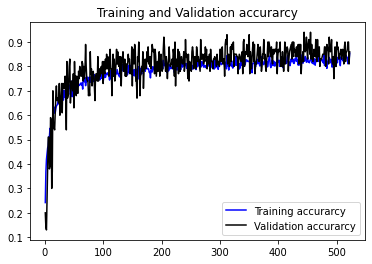

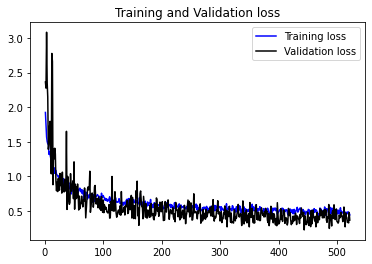

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.figure()
plt.plot(epochs, acc, 'blue', label='Training accurarcy')
plt.plot(epochs, val_acc, 'black', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'black', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

#Show Plot
plt.show()

### Menyimpan model dalam format .tflite

In [14]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpispratxo/assets
